# This code is for generating figure 6a

In [25]:
import glob
import os
# Ignore warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

#Process data
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [26]:
#Display data 
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.vector_transform import vector_scalar_to_grid
from matplotlib.axes import Axes
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.image as image
import matplotlib.pyplot as plt


## 1. check availability of dataset

Load 2000, 2005 and 2010 SPAM production data. 

In [27]:
spam_production=np.load('average_all.npy')
spam_production=np.where(spam_production <= 0, np.nan, spam_production)

In [28]:
min_lon = -100 
min_lat = 35
max_lon = -70
max_lat = 65
min_time=334  #1995
max_time=353  #2014

In [29]:
Path='/media/Data1/Climada/isimip3/nc4/'
gcms=['gfdl-esm4','ipsl-cm6a-lr','mpi-esm1-2-hr','mri-esm2-0','ukesm1-0-ll']
ggcms=['acea','crover','cygma1p74','dssat-pythia','epic-iiasa','isam',
       'ldndc','lpjml','pdssat','pepic','promet','simplace-lintul5']

### 1.1 Landuse data in percentages

In [30]:
fn1 = '/media/Data1/Climada/ISIMIP/data/landuse-15crops_2015soc_annual_1850_2014.nc'
ds_landuse=xr.open_dataset(fn1,decode_times=False)
ds1995to2014=ds_landuse.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon),time=slice(min_time,max_time))

ds2000=ds_landuse.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon),time=slice(339,339))
ds2005=ds_landuse.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon),time=slice(344,344))
ds2010=ds_landuse.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon),time=slice(349,349))

maize_rainfed_landuse_in_percentage_1995to2014 = ds1995to2014["maize_rainfed"]*100
maize_irrigated_landuse_in_percentage_1995to2014 = ds1995to2014["maize_irrigated"]*100

maize_rainfed_landuse_in_percentage_1995to2014_average = ds1995to2014["maize_rainfed"].mean(dim='time')*100
maize_irrigated_landuse_in_percentage_1995to2014_average = ds1995to2014["maize_irrigated"].mean(dim='time')*100

maize_rainfed_landuse_in_percentage_2000 = ds2000["maize_rainfed"].mean(dim='time')*100
maize_irrigated_landuse_in_percentage_2000 = ds2000["maize_irrigated"].mean(dim='time')*100

maize_rainfed_landuse_in_percentage_2005 = ds2005["maize_rainfed"].mean(dim='time')*100
maize_irrigated_landuse_in_percentage_2005 = ds2005["maize_irrigated"].mean(dim='time')*100

maize_rainfed_landuse_in_percentage_2010 = ds2010["maize_rainfed"].mean(dim='time')*100
maize_irrigated_landuse_in_percentage_2010 = ds2010["maize_irrigated"].mean(dim='time')*100


In [31]:
areainsqmeter=np.load('originalcode/code/ipynb/areainsqmeter_squared_meter_great_lake_region_35N65N.npy')

# combined_landuse=np.load('originalcode/code/ipynb/combined_landuse_35N65N.npy')
# rainfed_landuse=np.load('originalcode/code/ipynb/rainfed_landuse_35N65N.npy')
# irrigated_landuse=np.load('originalcode/code/ipynb/irrigated_landuse_35N65N.npy')


In [32]:
## check content in the data file
file='/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_simplace-lintul5_gswp3-w5e5_default_annual_mai_yield_and_production.nc4'
ds=xr.open_dataset(file,decode_times=False)
ds

<xarray.Dataset>
Dimensions:     (lon: 720, lat: 360, years: 37, irr: 2)
Coordinates:
  * lon         (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat         (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * years       (years) int32 1979 1980 1981 1982 1983 ... 2012 2013 2014 2015
  * irr         (irr) float64 1.0 2.0
Data variables:
    yield       (irr, years, lat, lon) float64 ...
    production  (irr, years, lat, lon) float64 ...

In [33]:
#check if all data are available
fns=glob.glob("/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_*default_annual_mai_yield_and_production.nc4")
len(fns)


11

In [34]:
fns

['/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_simplace-lintul5_gswp3-w5e5_default_annual_mai_yield_and_production.nc4',
 '/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_cygma1p74_gswp3-w5e5_default_annual_mai_yield_and_production.nc4',
 '/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_pepic_gswp3-w5e5_default_annual_mai_yield_and_production.nc4',
 '/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_epic-iiasa_gswp3-w5e5_default_annual_mai_yield_and_production.nc4',
 '/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_crover_gswp3-w5e5_default_annual_mai_yield_and_production.nc4',
 '/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_pdssat_gswp3-w5e5_default_annual_mai_yield_and_production.nc4',
 '/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_isam_gswp3-w5e5_default_annual_mai_yield_and_production.nc4',
 '/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_lpjml_gswp3-w5e5_default_annual_mai_yield_and_production.nc4',
 '/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3

## 2. Below is an example to display what information in the data file

### 2.1 Check data from GGCMI

In [35]:

fn='/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_acea_gswp3-w5e5_default_annual_mai_yield_and_production.nc4'
ds=xr.open_dataset(fn,decode_times=False)
ds

<xarray.Dataset>
Dimensions:     (lon: 720, lat: 360, years: 37, irr: 2)
Coordinates:
  * lon         (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat         (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * years       (years) int32 1979 1980 1981 1982 1983 ... 2012 2013 2014 2015
  * irr         (irr) float64 1.0 2.0
Data variables:
    yield       (irr, years, lat, lon) float64 ...
    production  (irr, years, lat, lon) float64 ...

In [36]:
cropped_ds00 = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon),years=slice('2015','2015'), irr=1.0)
cropped_ds01 = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon),years=slice('2015','2015'), irr=2.0)
cropped_ds00  

<xarray.Dataset>
Dimensions:     (lon: 60, lat: 60, years: 1)
Coordinates:
  * lon         (lon) float64 -99.75 -99.25 -98.75 ... -71.25 -70.75 -70.25
  * lat         (lat) float64 64.75 64.25 63.75 63.25 ... 36.25 35.75 35.25
  * years       (years) int32 2015
    irr         float64 1.0
Data variables:
    yield       (years, lat, lon) float64 ...
    production  (years, lat, lon) float64 ...

In [37]:
cropped_ds00['yield'].values.squeeze()

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [38]:
cropped_ds01

<xarray.Dataset>
Dimensions:     (lon: 60, lat: 60, years: 1)
Coordinates:
  * lon         (lon) float64 -99.75 -99.25 -98.75 ... -71.25 -70.75 -70.25
  * lat         (lat) float64 64.75 64.25 63.75 63.25 ... 36.25 35.75 35.25
  * years       (years) int32 2015
    irr         float64 2.0
Data variables:
    yield       (years, lat, lon) float64 ...
    production  (years, lat, lon) float64 ...

### 2.2 Check data from isimip3

In [39]:
file='/media/Data1/Climada/isimip3/maize3a/acea_gswp3-w5e5_obsclim_2015soc_default_yield-mai-noirr_global_annual-gs_1901_2016.nc'
ds2=xr.open_dataset(file,decode_times=False)
cropped_ds10 = ds2.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon),time=slice(114,114.0))
cropped_ds10

<xarray.Dataset>
Dimensions:          (lon: 60, lat: 60, time: 1)
Coordinates:
  * lon              (lon) float64 -99.75 -99.25 -98.75 ... -71.25 -70.75 -70.25
  * lat              (lat) float64 64.75 64.25 63.75 63.25 ... 36.25 35.75 35.25
  * time             (time) float64 114.0
Data variables:
    yield-mai-noirr  (time, lat, lon) float32 ...
Attributes:
    title:                    ACEA simulations for Ag-GRID GGCMI Phase 3 project
    institution:              University of Twente, Netherlands
    contact:                  Oleks Mialyk o.mialyk@utwente.nl
    isimip_comment:           Data is taken from GGCMI (AgMIP) Phase 3a and r...
    isimip_id:                cd500114-9319-411d-be9a-47a61978c171
    isimip_protocol_version:  027342a3356372791ca6318f6bd552ee712cfd4a
    isimip_qc_version:        3.0.2
    isimip_qc_pass_date:      2023-07-20 13:43 UTC

In [40]:
file='/media/Data1/Climada/isimip3/maize3a/acea_gswp3-w5e5_obsclim_2015soc_default_yield-mai-firr_global_annual-gs_1901_2016.nc'
ds1=xr.open_dataset(file,decode_times=False)
ds1

<xarray.Dataset>
Dimensions:         (lon: 720, lat: 360, time: 116)
Coordinates:
  * lon             (lon) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * lat             (lat) float64 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * time            (time) float64 0.0 1.0 2.0 3.0 ... 112.0 113.0 114.0 115.0
Data variables:
    yield-mai-firr  (time, lat, lon) float32 ...
Attributes:
    title:                    ACEA simulations for Ag-GRID GGCMI Phase 3 project
    institution:              University of Twente, Netherlands
    contact:                  Oleks Mialyk o.mialyk@utwente.nl
    isimip_comment:           Data is taken from GGCMI (AgMIP) Phase 3a and r...
    isimip_id:                b8e236a6-6ac8-4f8a-924f-a621891b1ba5
    isimip_protocol_version:  027342a3356372791ca6318f6bd552ee712cfd4a
    isimip_qc_version:        3.0.2
    isimip_qc_pass_date:      2023-07-20 13:43 UTC

In [41]:
cropped_ds11 = ds1.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon),time=slice(114,114))
cropped_ds11  

<xarray.Dataset>
Dimensions:         (lon: 60, lat: 60, time: 1)
Coordinates:
  * lon             (lon) float64 -99.75 -99.25 -98.75 ... -71.25 -70.75 -70.25
  * lat             (lat) float64 64.75 64.25 63.75 63.25 ... 36.25 35.75 35.25
  * time            (time) float64 114.0
Data variables:
    yield-mai-firr  (time, lat, lon) float32 ...
Attributes:
    title:                    ACEA simulations for Ag-GRID GGCMI Phase 3 project
    institution:              University of Twente, Netherlands
    contact:                  Oleks Mialyk o.mialyk@utwente.nl
    isimip_comment:           Data is taken from GGCMI (AgMIP) Phase 3a and r...
    isimip_id:                b8e236a6-6ac8-4f8a-924f-a621891b1ba5
    isimip_protocol_version:  027342a3356372791ca6318f6bd552ee712cfd4a
    isimip_qc_version:        3.0.2
    isimip_qc_pass_date:      2023-07-20 13:43 UTC

## 3. Check the ratio of production from model against the production from SPAM data


### 3.1 Comparison of 20-year averages

In [42]:
name_ggcms=['(a) simplace-lintul5','(b) cygma1p74','(c) pepic','(d) epic-iiasa','(e) crover','(f)pdssat',
       '(g) isam','(h) lpjml','(i) ldndc','(j) promet','(k) acea','(l) Ensemble']

#### 3.1.1 Calculate annual production

In [43]:
# 11 models, 20 years
production_1995to2014=np.empty(shape=(11,20,60,60))
production_1995to2014_rainfed=np.empty(shape=(11,20,60,60))
production_1995to2014_irrigated=np.empty(shape=(11,20,60,60))
ii=0
for fn in fns:
    print(fn)
    ds=xr.open_dataset(fn,decode_times=False)
    jj=0
    for iyear in range(1995,2015,1):
        try:
            cyear=str(iyear)
            # each year landuse data
            rainfed_landuse=maize_rainfed_landuse_in_percentage_1995to2014[jj,:,:]
            irrigated_landuse=maize_irrigated_landuse_in_percentage_1995to2014[jj,:,:]
            # each land use data
            cropped_ds1 = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon),years=slice(cyear,cyear), irr=1.0).fillna(0)
            cropped_ds2 = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon),years=slice(cyear,cyear), irr=2.0).fillna(0)

            #average over years and sum over irrigated and rainfed
            crop_isimip3a1_mean=cropped_ds1['yield'].values.squeeze()*(rainfed_landuse/100)*(areainsqmeter/10000)
            production_1995to2014_rainfed[ii,jj,:,:]=crop_isimip3a1_mean

            crop_isimip3a2_mean=cropped_ds2['yield'].values.squeeze()*(irrigated_landuse/100)*(areainsqmeter/10000)
            production_1995to2014_irrigated[ii,jj,:,:]= crop_isimip3a2_mean
        except Exception as e:
            print([ii,jj],fn)
        
        jj=jj+1
    ii=ii+1

/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_simplace-lintul5_gswp3-w5e5_default_annual_mai_yield_and_production.nc4
/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_cygma1p74_gswp3-w5e5_default_annual_mai_yield_and_production.nc4
/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_pepic_gswp3-w5e5_default_annual_mai_yield_and_production.nc4
/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_epic-iiasa_gswp3-w5e5_default_annual_mai_yield_and_production.nc4
/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_crover_gswp3-w5e5_default_annual_mai_yield_and_production.nc4
/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_pdssat_gswp3-w5e5_default_annual_mai_yield_and_production.nc4
/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_isam_gswp3-w5e5_default_annual_mai_yield_and_production.nc4
/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_lpjml_gswp3-w5e5_default_annual_mai_yield_and_production.nc4
/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_ldndc_gswp3-w5e5_default_annual_

In [44]:
production_1995to2014_rainfed=np.where(np.isnan(production_1995to2014_rainfed),0, production_1995to2014_rainfed)
production_1995to2014_irrigated=np.where(np.isnan(production_1995to2014_irrigated),0,production_1995to2014_irrigated)
production_1995to2014=production_1995to2014_rainfed+production_1995to2014_irrigated                                                                                          

In [45]:
mean_production=np.nanmean(production_1995to2014,axis=1)

In [46]:
mean_production.shape

(11, 60, 60)

In [47]:
ensembleMean=np.nanmean(mean_production,axis=0)

In [48]:
fn='/media/Data1/Climada/isimip3/maize3a/GGCMI_Phase3a_simplace-lintul5_gswp3-w5e5_default_annual_mai_yield_and_production.nc4'
ds=xr.open_dataset(fn,decode_times=False)

cropped_ds1 = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon),years=slice('1995','2014'), irr=1.0).fillna(0)
cropped_ds2 = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon),years=slice('1995','2014'), irr=2.0).fillna(0)

#average over years and sum over irrigated and rainfed
crop_isimip3a1_mean=cropped_ds1.mean(dim='years')*rainfed_landuse/100
crop_isimip3a2_mean=cropped_ds2.mean(dim='years')*irrigated_landuse/100
crop_isimip3a_mean= crop_isimip3a1_mean+crop_isimip3a2_mean

[898573.071616397, 80.6370009625094]
[927445.5085313303, 305.13071853587456]
[237753.8982157329, 321042.428771869]


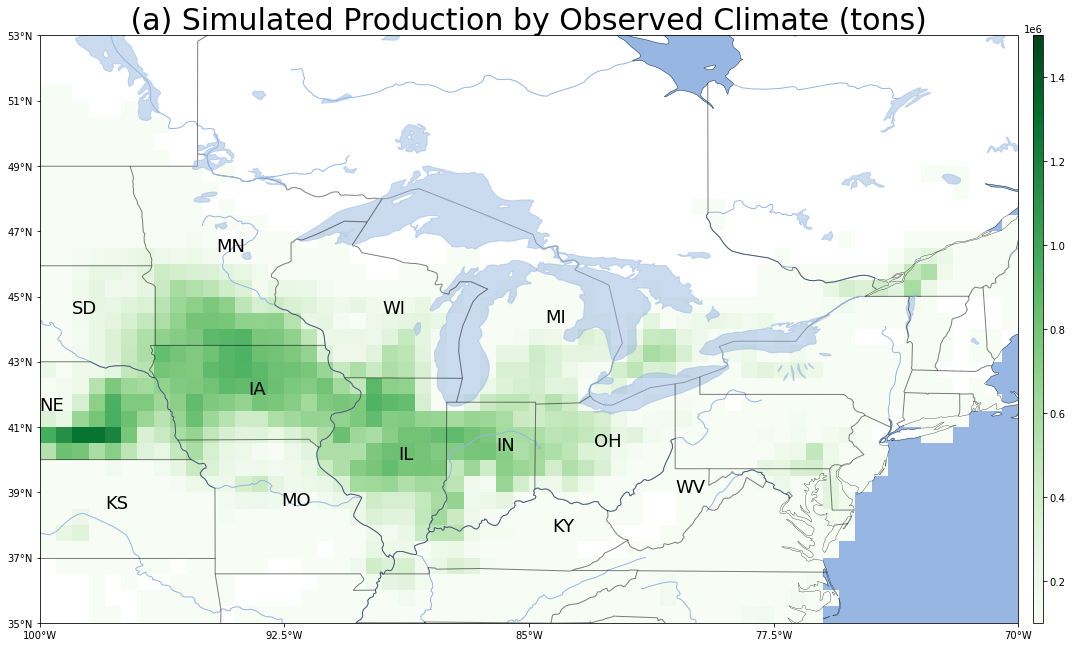

In [49]:
#Display data 
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.vector_transform import vector_scalar_to_grid
from matplotlib.axes import Axes
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.image as image
import matplotlib.pyplot as plt

provinces= ['Ontario', 'Quebec','Manitoba','Wisconsin','Vermont','Nebraska','New York','Kansas','Illinois',
            'Delaware','Connecticut','Indiana','Missouri','Michigan','New Jersey','Kentucky','Minnesota',
            'Ohio','Iowa','Pennsylvania','Maryland','Virginia','West Virginia','North Dakota','South Dakota','Nunavut']
provinces1=['ON','QC','MB','WI','VT','NE','NY','KS','IL','DE','CT','IN','MO','MI','NJ','KY','MN','OH','IA','PA','MD','VA','WV','ND','SD','NU']
Latitudes= [50,53,56.4,44.5,44,41.5,43,38.5,40,39,41.6,40.3,38.6,44.2,39.8,37.8,46.4,
            40.4,42,41.2,39,38,39,47.7,44.5,62]
Longitudes=[-85,-76,-98.7,-89.5,-72,-100,-75,-98,-89,-73.5,-72.7,-86,-92.6,-84.5,-74.9,-84.3,-94.6,
            -83,-93.6,-77.2,-76.6,-78,-80.5,-99,-99,-98]

mask=np.load('/media/Data1/Climada/isimip3/reference/isimip3b_mask60X60.npy')

lats = crop_isimip3a_mean.coords['lat'][:]
lons = crop_isimip3a_mean.coords['lon'][:]
X,Y = np.meshgrid(lons,lats)
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural',
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')
axes_class = (GeoAxes,
              dict(map_projection=projection))
# lons, lats = np.meshgrid(lons, lats)
title_text=["Refereance", "2050s", "2080s"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='1%',
                label_mode='')  # note the empty labe
for i, ax in enumerate(axgr):
#*************************************************************
    if i==0:
        data=ensembleMean.squeeze()
        data=np.where(data == 0, np.nan, data)
        data=data*mask
        subtitle=" (a) Simulated Production by Observed Climate (tons) "
        print([np.nanpercentile(data,99.0),np.nanpercentile(data,0)])
        print([np.nanpercentile(data[37:56,:40],99.0),np.nanpercentile(data[37:56,:40],0)])
        print([np.nanpercentile(data[37:56,:40],50.0),np.nanmean(data[37:56,:40])])          
  
                     
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)
    ax.set_title(subtitle, fontsize=30)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,53])
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 53, 10), crs=projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    
#     p = ax.contourf(lons, lats, data,50,
#                         transform=projection,
#                         cmap='BrBG')
    
#     l = ax.contour(lons, lats, data,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())
    for iprov in range(26):
        if Longitudes[iprov]<-80 and Latitudes[iprov]<47:
            ax.text(Longitudes[iprov],Latitudes[iprov],provinces1[iprov],fontsize=18)
#     p = ax.pcolormesh(X, Y, data,
#                       vmin=-300,
#                       vmax=300,
#                       transform=projection,
#                       cmap='Reds')
    p = ax.pcolormesh(X, Y, data,
                      transform=projection,
                      vmin=100000,
                      vmax=1500000,
                      cmap='Greens')    
#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
axgr.cbar_axes[0].colorbar(p)
plt.tight_layout()
plt.show()
fig.savefig('Figure_6a_isimip3a_production_for_maize_20Years.png',dpi=150)